# **Convolutional Networks**

**Required Reading**

- [Ian Goodfellow's Deep Learning: 9.1-9.4](https://www.deeplearningbook.org/contents/convnets.html)

**Additional Reading/Viewing**

- [LeCun et al 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf)
- [Blog Post from Christopher Olah](http://colah.github.io/posts/2014-07-Conv-Nets-Modular/)

---

**Recommended** [Jupyter Theme](https://github.com/dunovank/jupyter-themes) for viewing this notebook:

````
jt -t grade3 -cellw=90% -fs=14 -tfs=14 -ofs=14
````

**Recommended** [Jupyter Theme](https://github.com/dunovank/jupyter-themes) for presenting this notebook:

````
jt -t grade3 -cellw=90% -fs=20 -tfs=20 -ofs=20
````

---

- Last time, in our Introduction to Deep Learning notebook, we left off wondering how Yann LeCun beat our 7 layer deep network way back in 1998. 
- Here's a clip of Yann in 1993 at AT&T Bell Labs demonstrating LeNet-1, a precursor to his 1998 network.

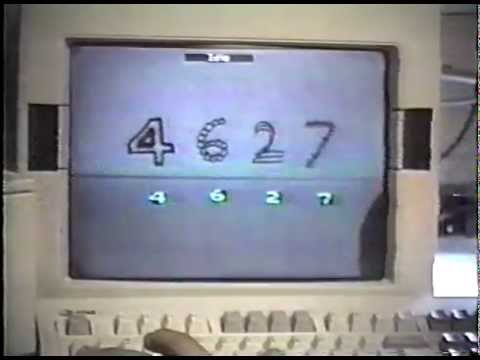

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('FwFduRA_L6Q', width = 960, height = 540)

- Yann LeCun joined AT&T Bell Labs in 1988 after leaving a postdoc position on Geoff Hinton's lab at the University of Toronto. 
- LeCun's research focused on optical charecter recognition (OCR), and developed a system that was used to read 10% of all the checks in the US in the late 1990s and early 2000s. [Source](https://en.wikipedia.org/wiki/Yann_LeCun).
- His collaborators at AT&T included Leon Bottou and [Vladimir Vapnik](https://en.wikipedia.org/wiki/Vladimir_Vapnik).
- In 2013, Yann became the director of Facebook AI Research (FAIR). 

---

### **So how did Yann Lecun beat our 7-layer deep network way back in 1998?**

- The key difference between Yann's network and ours is an idea that Yann called **weight sharing** in his [1989 Publication on Handwritten Zip Code Recognition](http://yann.lecun.com/exdb/publis/pdf/lecun-89e.pdf).

![](../graphics/birth_of_modern_cnn-01.png)

---

- Today we call Yann's idea a Convolutional Neural Network (CNN). 
- [Goodfellow](https://www.deeplearningbook.org/contents/convnets.html) gives a nice CNN definition: 
*"Convolutional networks are simply neural networks that use convolution in place of general matrix multiplication in at least one of their layers."*
- Here's a nice visualization of 2d convolution from Goodfellow:

![](../graphics/goodfellow_9_1-01.png)

![](../graphics/spacer_small-01.png)

---

- As you can imagine, there are many variants of convolution used in CNNS, here's some nice animtaions from [vdumoulin](https://github.com/vdumoulin/conv_arithmetic):


<table style="width:100%; table-layout:fixed;">
  <tr>
    <td><img width="150px" src="../videos/conv_animations/no_padding_no_strides.gif"></td>
    <td><img width="150px" src="../videos/conv_animations/arbitrary_padding_no_strides.gif"></td>
    <td><img width="150px" src="../videos/conv_animations/same_padding_no_strides.gif"></td>
    <td><img width="150px" src="../videos/conv_animations/full_padding_no_strides.gif"></td>
  </tr>
  <tr>
    <td>**No padding, no strides**</td>
    <td>**Arbitrary padding, no strides**</td>
    <td>**Half padding, no strides**</td>
    <td>**Full padding, no strides**</td>
  </tr>
  <tr>
    <td><img width="150px" src="../videos/conv_animations/no_padding_strides.gif"></td>
    <td><img width="150px" src="../videos/conv_animations/padding_strides.gif"></td>
    <td><img width="150px" src="../videos/conv_animations/padding_strides_odd.gif"></td>
    <td></td>
  </tr>
  <tr>
    <td>**No padding, strides**</td>
    <td>**Padding, strides**</td>
    <td>**Padding, strides (odd)**</td>
    <td></td>
  </tr>
</table>

![](../graphics/spacer_small-01.png)

---

- The convolution operation is used in many areas of mathematics and engineering, we can express 2d convolution like this:

$$
S(i, j) = \sum_m \sum_n I(i-m, j-n)K(m, n)
$$

- Where $I$ is our input image, $K$ is kernel and S is our output. 
- Subtracting $m$ and $n$ from $i$ and $j$ has the effect of flipping our kernel $K$ makes convolution commutative. However, in Convolutional Neural Networks, we don't really care about the computative property, and many libraries, including tensorflow implement the **cross-correlation** function instead of **convolution**:

$$
S(i, j) = \sum_m \sum_n I(i+m, j+n)K(m, n)
$$

--- 

![](../graphics/spacer_small-01.png)

## **Why CNNs?**

- As nicely stated the exceprt from Yann Lecun's 1989 paper above, CNNs "allow us to express information about the geometry and topology of the task". The arrangement of the pixels in our images is not arbitrary, and we know the lots of information can be gleaned by looking at local neighborhoods of our images (such as edge detection) - CNNs are an ideal tool for this. 
- Aside from taking advantage of the topology of images, CNNs are also **incredibly efficient**. 
- Let's have a look at LeCun's 1998 convolutional neueral network, LeNet-5, that achieves a 99.05 accuracy on mnist. 

![](../graphics/question_two-01.png)

---

![](../graphics/question_three-01.png)

---

- So, the first layer of LeNet-5 has way less parameters than our 7 layer fully connected layers. 
- **Why might this be advantageous?**

![](../graphics/spacer_small-01.png)

---

## **Pooling**

- Let's look at one more interesting idea from LeNet-5. After each convolutional layer, Yann includes a "subsampling" layer. Today we call this a **pooling** layer. 

![](../graphics/lenet_5_screenshot.png)

- Notice that after each of Yann's pooling layers, our feature maps decrease in size by a factor of 2. 

![](../graphics/spacer_small-01.png)

---

 ![](../graphics/pooling-01.png)

---

Ok, I'm thinkig we do the following:

- Introduce CNNs
- Look at LeNet-5, MC question on counting parameters
- Review + Train tensorflow implementation
- Basic visualization of what our network learned. 